# Segmentation: Clustering and Classification

<font size=4><b>Segmentation</b><br></font>
Segmentation is the process of categorization of a target population into groups that can be differentiated from each other based on combinations of shared characteristics.
It is a form of optimization and requires an iterative approach.

<font size=4><b>Market Segmentation</b><br></font>
One of the domains where segmentation is essential is in market segmentation, which allows companies to devise optimum marketing strategies. 
In a well-segmented market the smaller groups would appear homogeneous (relative to the overall market) in terms of consumption patterns, product interest, resonse to marketing efforts etc. 

<b>Benefits and Limitations</b><br>
A marketeer that understands the differences between segments will be able to make better strategic choices for product design, marketing budgets, product positioning and nuanced promotional efforts. 
However, the most difficult part in effective market segmentation is finding actionable results which would allow for differentiated actions in the real world.  

<b>Segmentation Methods</b><br>
Two approaches which are useful in segmentation projects are :<br>
1) <b>Classification (supervised learning)</b><br>
&emsp; Predict an outcome on new data based on a model built by learning from data where outcome was available.<br>

2) <b>Clustering (unsupervised learning)</b><br>
&emsp; We do not know the outcome groupings but attempt to discover them from structure in the data.<br>

Clustering and classification are not mutually exclusive. Sometimes, classification is used after segmentation has been done with clustering, for prediction of some outcome variables of interest that are known.

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

<a id='index'></a>
## Index
- [1) Import packages](#1%29-Import-packages)
- [2) Pre-defined functions](#2%29-Pre-defined-functions)
- [3) Load data](#3%29-Load-data)
- [4) Preliminary data exploration](#4%29-Preliminary-data-exploration)
- [5) Feature adjustments](#5%29-Feature-adjustments)
    - [Convert categorical variables to numerical](#Convert-categorical-variables-to-numerical)
    - [Standardize data](#Standardize-data)
- [Defined functions](#Defined-functions)
- [6) Cluster analysis](#6%29-Cluster-analysis)
    - [a) Mean-based clustering (k-means)](#a%29-Mean-based-clustering-(k-means%29)
        - [Unstandardized data](#Unstandardized-data)
            - [Segment distinguishing features](#obs-kmeans)
        - [Standardized data](#Standardized-data)
            - [Segment distinguishing features](#obs-kmeans2)
    - [b) Hierarchical clustering](#b%29-Hierarchical-clustering)
        - [Dendrogram](#Dendrogram)
        - [Goodness-of-fit test](#Goodness-of-fit-test)
        - [Segment assignments](#Segment-assignments)
        - [Segment summary](#Segment-summary)
    - [c) Model-based clustering](#c%29-Model-based-clustering)
    - [d) Latent Class Analysis](#d%29-Latent-Class-Analysis)
- [7) Comparing Cluster Solutions](#7%29-Comparing-Cluster-Solutions)
- [8) Concluding summary](#8%29-Concluding-summary)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

## 1) Import packages

In [1]:
library(ggplot2)
suppressPackageStartupMessages(library(splitstackshape))
suppressPackageStartupMessages(library(dplyr))

Warning message:
"package 'splitstackshape' was built under R version 4.0.4"


###### Some preliminary workings

In [2]:
# Save default settings
defop = options()
defpar = par(no.readonly=T)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

## 2) Pre-defined functions

##### Function to specify plot parameters

In [3]:
# Function to specify plot parameters
plot_pars = function(w=6, h=5) options(repr.plot.width=w, repr.plot.height=h)

##### Function to return frequency table

In [4]:
# Function to return frequency table
fd = function(data, sorted=F) {
    fd = table(data)
    fd = rbind('Freq'=fd, '%'=round(prop.table(fd)*100))
    if (sorted == T) fd = fd[, order(fd['Freq',], decreasing=T)]
    return(fd)
}

[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

## 3) Load data

In [5]:
dfo = read.csv("http://goo.gl/qw303p")

# Export for safekeep
# write.csv(dfo, file='Subsricption.csv', row.names=F)

dim(dfo)
head(dfo)

[1] 300   7

,age,gender,income,kids,ownHome,subscribe,Segment
,<dbl>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>
1,47.31613,Male,49482.81,2,ownNo,subNo,Suburb mix
2,31.38684,Male,35546.29,1,ownYes,subNo,Suburb mix
3,43.20034,Male,44169.19,0,ownYes,subNo,Suburb mix
4,37.31700,Female,81041.99,1,ownNo,subNo,Suburb mix
5,40.95439,Female,79353.01,3,ownYes,subNo,Suburb mix
6,43.03387,Male,58143.36,4,ownYes,subNo,Suburb mix


In [6]:
# Drop the 'segment' column and save it separately
df = dfo[setdiff(names(dfo), c('Segment'))]
y = dfo['Segment']

nrow(y)
head(df)

[1] 300

,age,gender,income,kids,ownHome,subscribe
,<dbl>,<chr>,<dbl>,<int>,<chr>,<chr>
1,47.31613,Male,49482.81,2,ownNo,subNo
2,31.38684,Male,35546.29,1,ownYes,subNo
3,43.20034,Male,44169.19,0,ownYes,subNo
4,37.31700,Female,81041.99,1,ownNo,subNo
5,40.95439,Female,79353.01,3,ownYes,subNo
6,43.03387,Male,58143.36,4,ownYes,subNo


[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

## 4) Preliminary data exploration

### Check for data integrity

#### Check for missing values

In [7]:
anyNA(df)

[1] FALSE

#### Check for data consistency
To ensure that the variables have been understood as per their nature

In [8]:
str(df)

'data.frame':	300 obs. of  6 variables:
 $ age      : num  47.3 31.4 43.2 37.3 41 ...
 $ gender   : chr  "Male" "Male" "Male" "Female" ...
 $ income   : num  49483 35546 44169 81042 79353 ...
 $ kids     : int  2 1 0 1 3 4 3 0 1 0 ...
 $ ownHome  : chr  "ownNo" "ownYes" "ownYes" "ownNo" ...
 $ subscribe: chr  "subNo" "subNo" "subNo" "subNo" ...


<div class="alert alert-block alert-info">
    Numeric variables have been read as numeric (num and int) and categorical as character (chr).<br>
    We can save categorical columns as 'factor' instead.
</div>

In [9]:
# Saving categorical columns as 'factor'
df$gender = as.factor(df$gender)
df$ownHome = as.factor(df$ownHome)
df$subscribe = as.factor(df$subscribe)
str(df)

'data.frame':	300 obs. of  6 variables:
 $ age      : num  47.3 31.4 43.2 37.3 41 ...
 $ gender   : Factor w/ 2 levels "Female","Male": 2 2 2 1 1 2 2 2 1 1 ...
 $ income   : num  49483 35546 44169 81042 79353 ...
 $ kids     : int  2 1 0 1 3 4 3 0 1 0 ...
 $ ownHome  : Factor w/ 2 levels "ownNo","ownYes": 1 2 2 1 2 2 1 1 1 2 ...
 $ subscribe: Factor w/ 2 levels "subNo","subYes": 1 1 1 1 1 1 1 1 1 1 ...


#### Summary statistics

In [10]:
summary(df)

      age           gender        income            kids        ownHome   
 Min.   :19.26   Female:157   Min.   : -5183   Min.   :0.00   ownNo :159  
 1st Qu.:33.01   Male  :143   1st Qu.: 39656   1st Qu.:0.00   ownYes:141  
 Median :39.49                Median : 52014   Median :1.00               
 Mean   :41.20                Mean   : 50937   Mean   :1.27               
 3rd Qu.:47.90                3rd Qu.: 61403   3rd Qu.:2.00               
 Max.   :80.49                Max.   :114278   Max.   :7.00               
  subscribe  
 subNo :260  
 subYes: 40  
             
             
             
             

<div class="alert alert-block alert-info">
    - None of the columns has min or max values that are very unusual.<br>
    - Income has a negative minimum value. That is a plausible scenario in case of a person with monthly debt repayments due.<br>
    - Max kids = 7. Sure, I can believe that. Some folks must be quite optimistic that humanity will tackle climate change well.<br><br>
    <b>Overall, there are no obviously unusual values in the columns and the data seems to be consistent and complete.</b><br>
</div>

[go to toc](#index)

 <div align="center"><b>-----------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### Data distribution

In [11]:
# Numerical columns
df_num = df[names(df)[sapply(df, is.numeric)]]
head(df_num, 1)

,age,income,kids
,<dbl>,<dbl>,<int>
1,47.31613,49482.81,2


#### Histograms

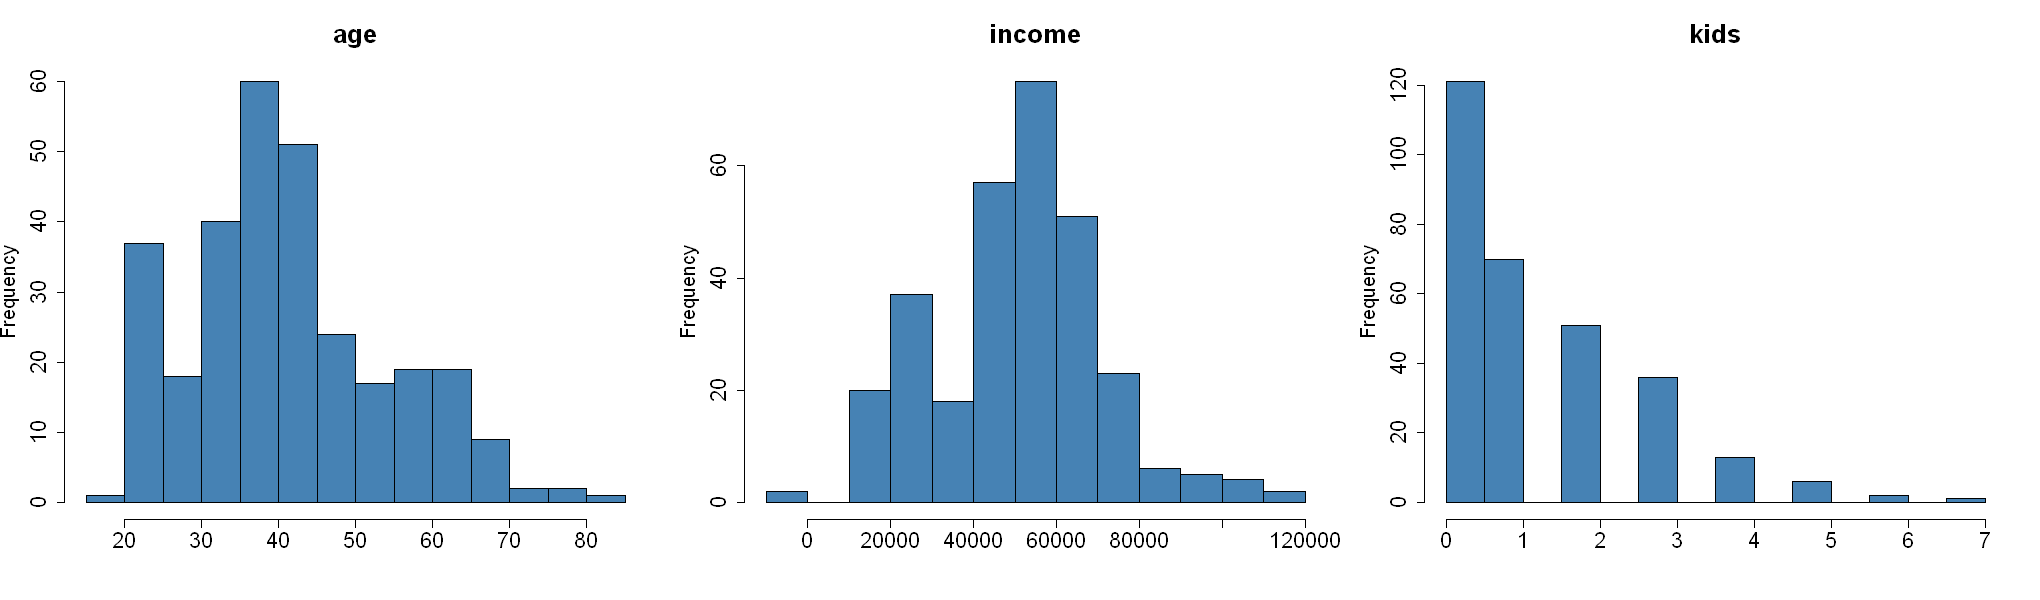

In [12]:
par(mfrow=c(1,3))
plot_pars(17, 5)
for (i in seq(ncol(df_num))) {
    var = names(df_num)[i]
    hist(df[, var], col='steelblue', main=var, xlab='', cex.main=2, cex.lab=1.5, cex.axis=1.7)
}

#### Value counts

In [13]:
# Value counts of factors
for (var in names(df)[sapply(df, is.factor)]) {
    cat('Variable :', var, '\n')
    print(cbind('count'=table(df[,var]), 'perc'=round(prop.table(table(df[,var]))*100, 1)))
    cat('\n\n')
}

Variable : gender 
       count perc
Female   157 52.3
Male     143 47.7


Variable : ownHome 
       count perc
ownNo    159   53
ownYes   141   47


Variable : subscribe 
       count perc
subNo    260 86.7
subYes    40 13.3




[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

## 5) Feature adjustments
In order to perform techiques of cluster analysis, we will need to convert non-numeric data into numerical forms. Dummy variables will be introduced for categorical features.

#### Convert categorical variables to numerical

In [14]:
# Convert categorical columns to dummies
# dfn = cSplit_e(df, 'gender', drop=T, fill=0, type='character')   # library:splitstackshape
dfn = data.frame(df)
dfn$male = ifelse(dfn$gender == 'Female', 0, 1)
dfn$ownHome = ifelse(dfn$ownHome == 'ownNo', 0, 1)
dfn$subscribe = ifelse(dfn$subscribe == 'subNo', 0, 1)
dfn = dfn[, !grepl('gender', names(dfn))]
dfn = dfn[, c('age','income','kids','male','ownHome','subscribe')]
head(dfn, 1)

,age,income,kids,male,ownHome,subscribe
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,47.31613,49482.81,2,1,0,0


#### Standardize data

In [15]:
# Standardize data
dfn_sz = scale(dfn)

# To standardize numeric columns in a mixed dataset without error
# rapply(df, scale, c("numeric","integer"), how="replace")

head(dfn_sz)

age,income,kids,male,ownHome,subscribe
0.48133138,-0.0721898,0.5183027,1.0460604,-0.9401258,-0.391578
-0.77221071,-0.7642562,-0.1917010,1.0460604,1.0601418,-0.391578
0.15744276,-0.3360563,-0.9017048,1.0460604,1.0601418,-0.391578
-0.30554218,1.4949908,-0.1917010,-0.9527812,-0.9401258,-0.391578
-0.01930052,1.4111190,1.2283065,-0.9527812,1.0601418,-0.391578
0.14434200,0.3578800,1.9383103,1.0460604,1.0601418,-0.391578


[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

## Defined functions

##### Function to get segment-wise metrics
This function will provide us a quick glance at the overall differences between groups.

In [16]:
# Function to get segment-wise metrics - mean or median
seg_summ = function(data, groups, metric='mean') {
    if (metric=='mean') aggregate(data, list(groups), function(x) mean(as.numeric(x)))
    else if (metric=='median') aggregate(data, list(groups), function(x) mean(as.numeric(x)))
    else print('Mean or Median?')
}

##### Function to generate boxplots for clusters

In [17]:
segment_boxplot = function(data, segments, title='Boxplot', xlab='', ylab='segment') {
    plot_pars(12,4)
    boxplot(data ~ segments, horizontal=T, ylab=ylab, xlab=xlab, cex.lab=1.5,
            main=title, cex.main=1.5, col='cadetblue')
    abline(v=quantile(data, c(0.1,0.25,0.5,0.75,0.9)), lty=c(3,4,5,4,3), col=alpha(rgb(0,0,0), 0.2))
    abline(v=mean(data), lty=2, col=alpha('red', 0.5))
}

[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

## 6) Cluster analysis

There are many methods available for clustering. Some of the popular ones are:<br>

<b>a) Distance based</b><br>
    1) Kmeans<br>
    2) Hierarchical clustering<br>
The approch is to maximize distances between the clusters and minimize distances within the segments.<br>

<b>b) Model based</b><br>
    1) Mclust : Model-Based Clustering<br>
    2) poLCA: Latent class analysis of polytomous outcome variables<br>
Model-based methods view the data as a mixture of groups sampled from different (unknown) distributions.  
These methods attempt to model the data such that the observed variance can be best represented by a small number of groups with specific distribution characteristics such as different means and standard deviations.

Each of these methods have their own limitations, so we shall not presume that they can give complete solutions.<br>

<font size=4><b>Distance measures</b></font><br>
This forms the backbone of the clustering process.

<b><i>Euclidean distance</i></b><br>
One of the ways for calculating distance between <b><i>numerical</i></b> observations is Euclidean distance.<br>
If &nbsp;$p(p_1, p_2, ..., p_n)$ &nbsp;and &nbsp;$q(q_1, q_2, ..., q_n)$ are 2 points in n-dimensional space, then Euclidean distance between them is calculated as :

$$ d(p,q) = \sqrt{\sum{(p_i - q_i)^2}} $$

Standardization of data is essential before calculating euclidean distances. 
If the the eucladian distance is calculated without adjusting the scale of the features, the segmentation would be unduly dominated by the feature or variable having larger spread.

<b><i>Gower's distance</i></b><br>
Euclidean distance can only be used when all our data is numeric. But, when we have a dataset that has <b>both quantitative and qualitative</b> features, we can use Gower's distance that calculates a [general dissimilarity coefficient](https://www.rdocumentation.org/packages/cluster/versions/2.1.1/topics/daisy) by rescaling the values.<br> 

As per [this medium article](https://medium.com/analytics-vidhya/gowers-distance-899f9c4bd553), Gower's distance uses the following metrics for the different data types:<br>
    a) <b>quantitative (interval)</b>: range-normalized [Manhattan distance](https://en.wikipedia.org/wiki/Taxicab_geometry)<br>
    b) <b>ordinal</b>: variable is first ranked, then Manhattan distance is used with a special adjustment for ties<br>
    c) <b>nominal</b>: variables of k categories are first converted into k binary columns and then the Dice coefficient is used<br>

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### a) Mean-based clustering (k-means)

K-means clustering attempts to find groups that are most compact, in terms of the mean sum-of-squares deviation of each observation from the multivariate center (centroid) of its assigned group. 
Because it explicitly computes a mean deviation, k-means clustering relies on Euclidean distance.
Thus it is only appropriate for numeric data or data that can be reasonably coerced to numeric.

A limitation of k-means analysis is that it requires specifying the number of clusters, and it can be difficult to determine whether one solution is better than another.

#### Deciding optimum number of clusters
One metric that can be used in deciding the optimum number of clusters is <b><i>Within Sum-of-Squares (WSS)</i></b>.<br>
Within a cluster, the Euclidean Distance of each observation from the cluster centroid is calcluted, squared and summed up. 
This is done for all the clusters, and the total of WSS for all clusters becomes our (Total) Within sum-of-squares number.
As the no. of clusters go up, the wss would go down because the clusters would provide a much tighter fit.

The optimum k level is where increasing k would not result in a significant reduction in Total WSS.
Even then you may get 3-4 possible k levels.
It may require some trial and error to decide upon the final number.<br>

Points that should be kept in consideration when deciding the optimum k level:<br>
a) Clusters should be interpretable.<br>
b) They should be able to provide results that can be translated into business actions.<br>

##### Function to plot 'within sum of squares' from kmeans algorithm at various k levels

In [18]:
# Function to plot 'within sum of squares' from kmeans algorithm at various k levels
elbowDiagram = function(data, max_k=15, out_wss=F) {
    wss = c()   # empty vector for saving within sum of squares
    for (i in seq(max_k)) {
        kmeans_model = kmeans(data, centers=i)
        wss[i] = kmeans_model$tot.withinss
    }
    plot(wss, col='red', pch=19, main='Within Sum of Squares \nat different k-means cluster levels', 
         cex.main=1.5, xlab='k', ylab='WSS', cex.lab=1.3, cex.axis=1.2)
    if (out_wss == T) return(round(wss))
}

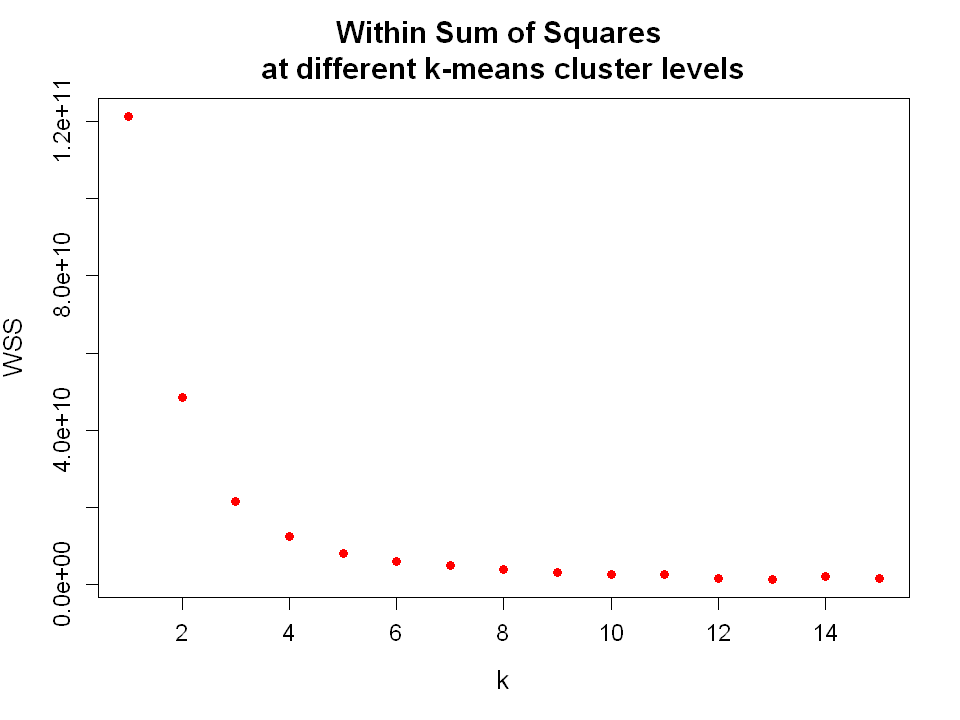

In [19]:
plot_pars(8,6)
elbowDiagram(dfn, max_k=15, out_wss=F)

<div class="alert alert-block alert-info">
    We can see that the marginal decrease in WSS beyond k=4 is not very significant. So, we will build our model with k = 4.
</div>

#### K-means model

##### Unstandardized data
First, let us build our model on unstandardized data.

In [20]:
set.seed(1)
clust_k = kmeans(dfn, centers=4)
clust_k$centers

,age,income,kids,male,ownHome,subscribe
1,55.40968,89959.96,0.360000,0.4000000,0.8400000,0.12000000
2,29.58704,21631.79,1.063492,0.5714286,0.3015873,0.15873016
3,42.38909,47799.84,1.434783,0.4695652,0.5304348,0.16521739
4,43.66931,63630.70,1.443299,0.4432990,0.4123711,0.08247423


In [21]:
# Frequency table of clusters
table(clust_k$cluster)


  1   2   3   4 
 25  63 115  97 

</a><div class="alert alert-block alert-info">
    The groups appear to vary by age, income and home-ownership.<br>
    There is very little variation in gender ratio.
</div>

##### Clusplot
We visualize the clusters by plotting them against a dimensional plot. 
clusplot() will perform dimensional reduction with principal components or multidimensional scaling as the data warrant, and then plot the observations with cluster membership identified

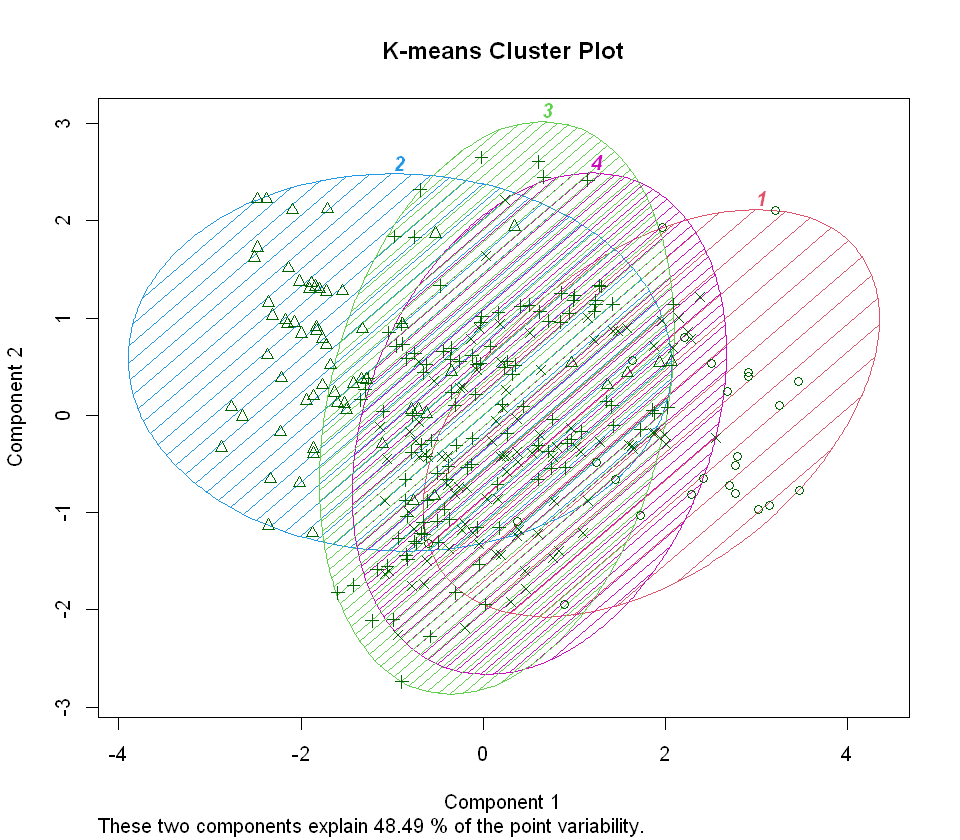

In [22]:
# Plot of first 2 principal components of the predictors
library(cluster)
plot_pars(8,7)
clusplot(df, clust_k$cluster, color=T, shade=T, labels=4, lines=0, main="K-means Cluster Plot")

<div class="alert alert-block alert-info">
    Based on the pricipal components plot, we can see that :<br>
    - groups 3 and 4 overlap significantly<br>
    - groups 1 and 2 are modestly differentiated<br>
    - group 2 is different is some respects from 3 or 4<br>
    - group 1 is different is some respects from 3 or 4<br>
</div>

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

##### Segment distributions

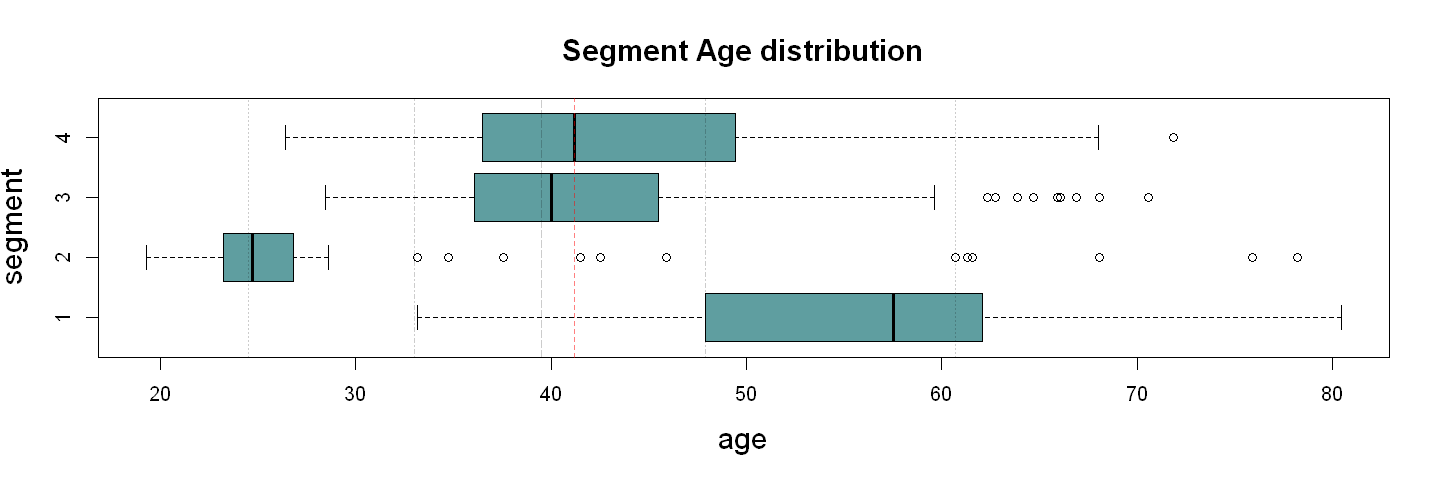

In [23]:
# Age distribution in groups
segment_boxplot(dfn$age, clust_k$cluster, title='Segment Age distribution', xlab='age')

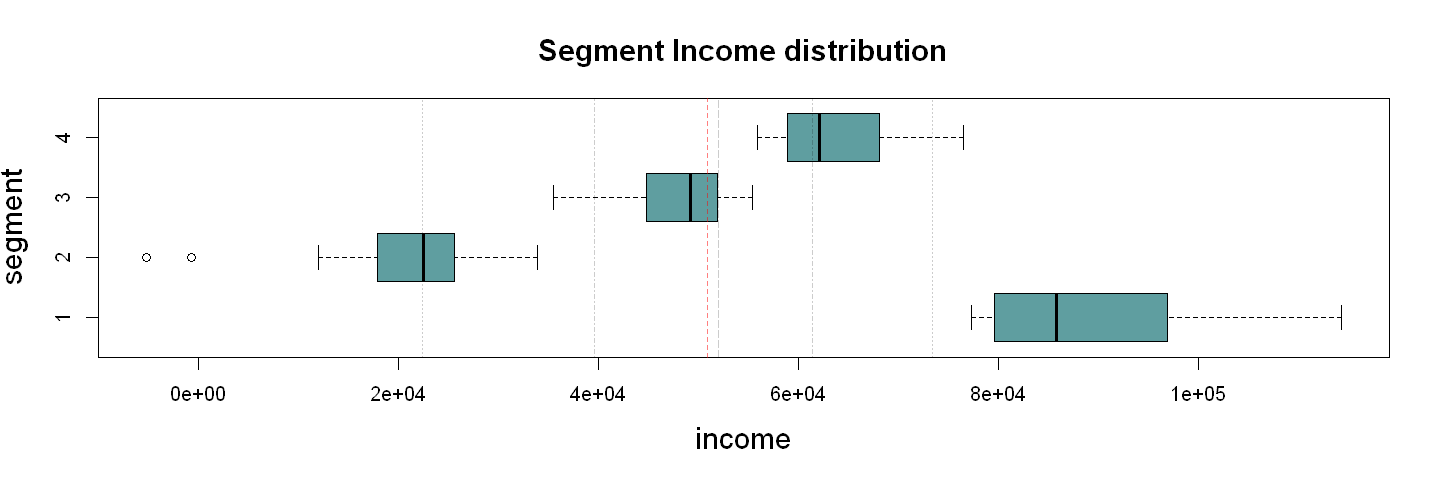

In [24]:
# Income distribution in groups
segment_boxplot(dfn$income, clust_k$cluster, title='Segment Income distribution', xlab='income')

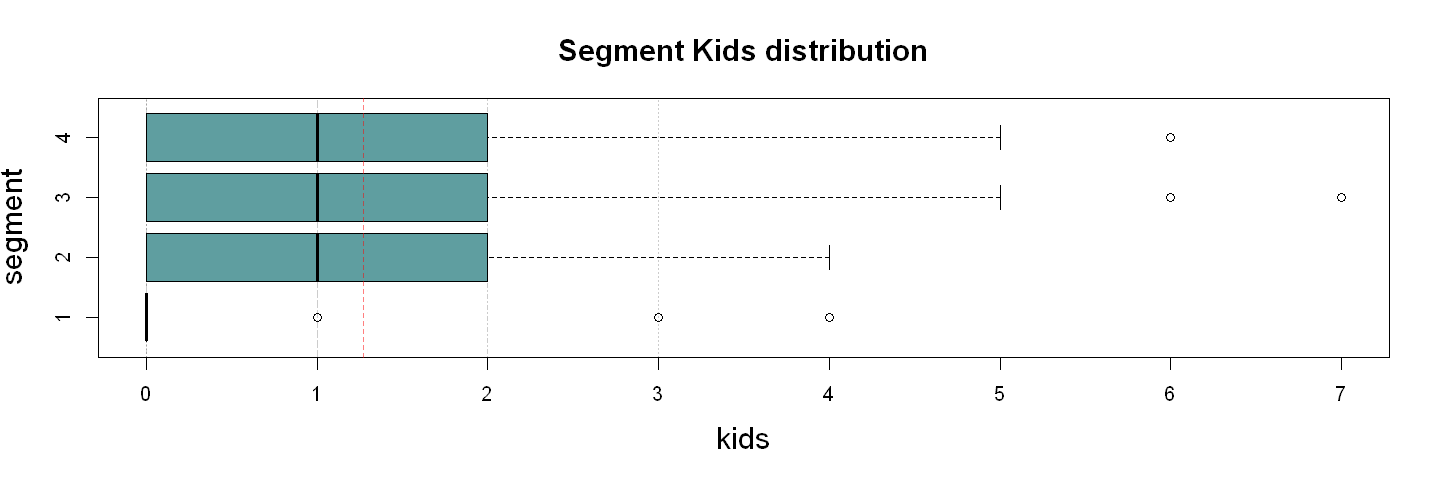

In [25]:
# Kids distribution in groups
segment_boxplot(dfn$kids, clust_k$cluster, title='Segment Kids distribution', xlab='kids')

In [26]:
# Home-ownership 
for (i in seq(n_distinct(clust_k$cluster))) {
    cat(paste('Cluster :', i, '\n'))
    print(fd(df$ownHome[clust_k$cluster == i]))
    cat('\n')
}

Cluster : 1 
     ownNo ownYes
Freq     4     21
%       16     84

Cluster : 2 
     ownNo ownYes
Freq    44     19
%       70     30

Cluster : 3 
     ownNo ownYes
Freq    54     61
%       47     53

Cluster : 4 
     ownNo ownYes
Freq    57     40
%       59     41



In [27]:
# Overall
summary(df[, names(df)[sapply(df, is.numeric)]])

      age            income            kids     
 Min.   :19.26   Min.   : -5183   Min.   :0.00  
 1st Qu.:33.01   1st Qu.: 39656   1st Qu.:0.00  
 Median :39.49   Median : 52014   Median :1.00  
 Mean   :41.20   Mean   : 50937   Mean   :1.27  
 3rd Qu.:47.90   3rd Qu.: 61403   3rd Qu.:2.00  
 Max.   :80.49   Max.   :114278   Max.   :7.00  

In [28]:
# Value counts of factors
for (var in names(df)[sapply(df, is.factor)]) {
    cat('Variable :', var, '\n')
    print(cbind('count'=table(df[,var]), 'perc'=round(prop.table(table(df[,var]))*100, 1)))
    cat('\n\n')
}

Variable : gender 
       count perc
Female   157 52.3
Male     143 47.7


Variable : ownHome 
       count perc
ownNo    159   53
ownYes   141   47


Variable : subscribe 
       count perc
subNo    260 86.7
subYes    40 13.3




<a id='obs-kmeans'></a><div class="alert alert-block alert-info">
<h5>Segment distinguishing features</h5><br>
    <b>Group 1</b><br>
    - <b>Age</b>: old<br>
    - <b>Income</b>: highest income group (in the top 90th percentile overall)<br>
    - <b>Kids</b>: mostly don't have kids<br>
    - <b>Gender</b>: predominantly female (60%)<br>
    - <b>Home-ownership</b>: high home-ownership (almost double the overall rate of 47%)<br>
    - <b>Subscribe</b>: slightly below avg subscription rate<br>
    <br>
    <b>Group 2</b><br>
    - <b>Age</b>: young<br>
    - <b>Income</b>: low income<br>
    - <b>Kids</b>: distribution similar to overall sample<br>
    - <b>Gender</b>: mostly male (57%)<br>
    - <b>Home-ownership</b>: lowest home-ownership rates at 30% (overall 47%)<br>
    - <b>Subscribe</b>: high subscription rates<br>
    <br>
    <b>Group 3</b><br>
    - <b>Age</b>: mix of old and young, but slightly younger than average<br>
    - <b>Income</b>: middle level income<br>
    - <b>Kids</b>: distribution similar to overall sample<br>
    - <b>Gender</b>: mixed, same as overall (47% males, 53% females)<br>
    - <b>Home-ownership</b>: 53%, slightly above overall rate of 47%<br>
    - <b>Subscribe</b>: highest subscription rate<br>
    <br>
    <b>Group 4</b><br>
    - <b>Age</b>: mix of old and young, but slightly older than average<br>
    - <b>Income</b>: high<br>
    - <b>Kids</b>: distribution similar to overall sample<br>
    - <b>Gender</b>: mixed gender ratio<br>
    - <b>Home-ownership</b>: 41% (slightly lower than overall rate of 47%)<br>
    - <b>Subscribe</b>: lowest subscription rates<br>
</div>

 <div align="center"><b>-----------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

#### Standardized data

In [29]:
set.seed(1)
clust_k_sz = kmeans(dfn_sz, centers=4)

In [30]:
# Frequency table - Clusters
table(clust_k_sz$cluster)


  1   2   3   4 
 72  38 121  69 

In [31]:
# Segment-wise means
seg_summ(dfn, clust_k_sz$cluster)

Group.1,age,income,kids,male,ownHome,subscribe
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,58.28987,64306.43,0.02777778,0.4444444,0.7777778,0.02777778
2,37.72319,44605.01,1.31578947,0.4736842,0.4210526,1.00000000
3,34.08013,46087.24,1.56198347,0.4958678,0.0000000,0.00000000
4,37.76591,48976.11,2.02898551,0.4782609,1.0000000,0.00000000


<a id='obs-kmeans2'></a><div class="alert alert-block alert-info">
<h5>Segment distinguishing features</h5><br>
    The differentiation between the groups has reduced considerably compared with the model built on unstandardized data.<br>
    Groups 2-4 have similar ages, incomes, gender ratio amongst themselves, but differ from group 1 (except on gender-ratio).<br>
    Groups 3 and 4 are non-subscibers that have similar feature means, and differ on home-ownership (and slightly on kids). Group 3 are all renters, while 4 are all home-owners.<br>
    Group 2 contains subscribers, but is similar to 2 and 3 on other variables except home-ownership.<br>
    <br>
    <b>Unstandardized data has provided a more meaningful and useful segmentation for this dataset.</b>
</div>

##### Segment distributions

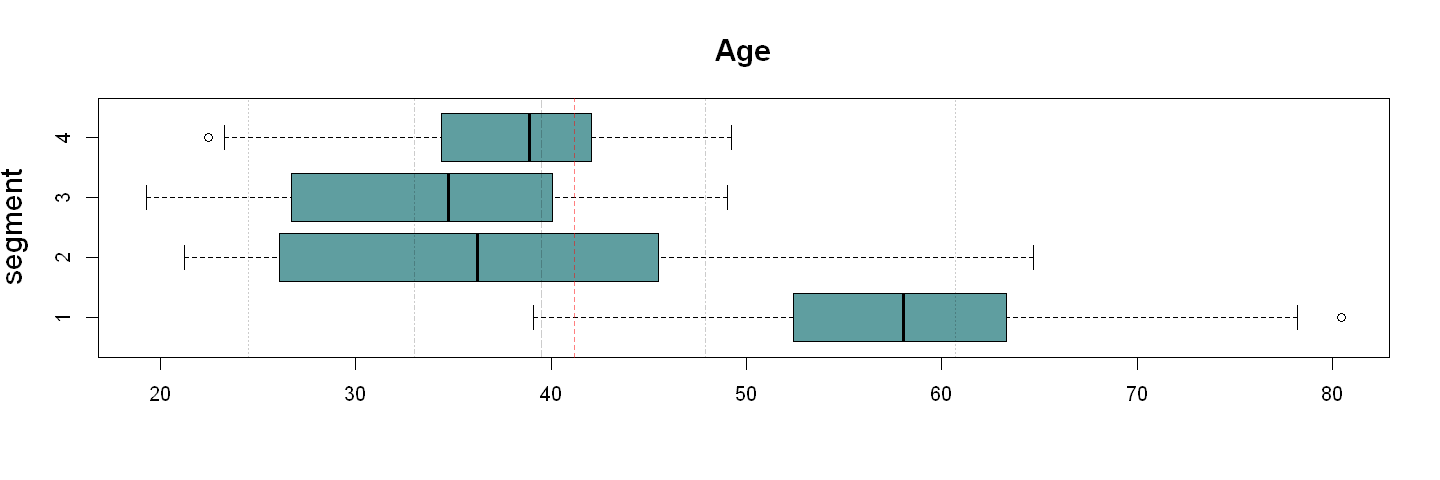

In [32]:
segment_boxplot(dfn$age, clust_k_sz$cluster, 'Age')

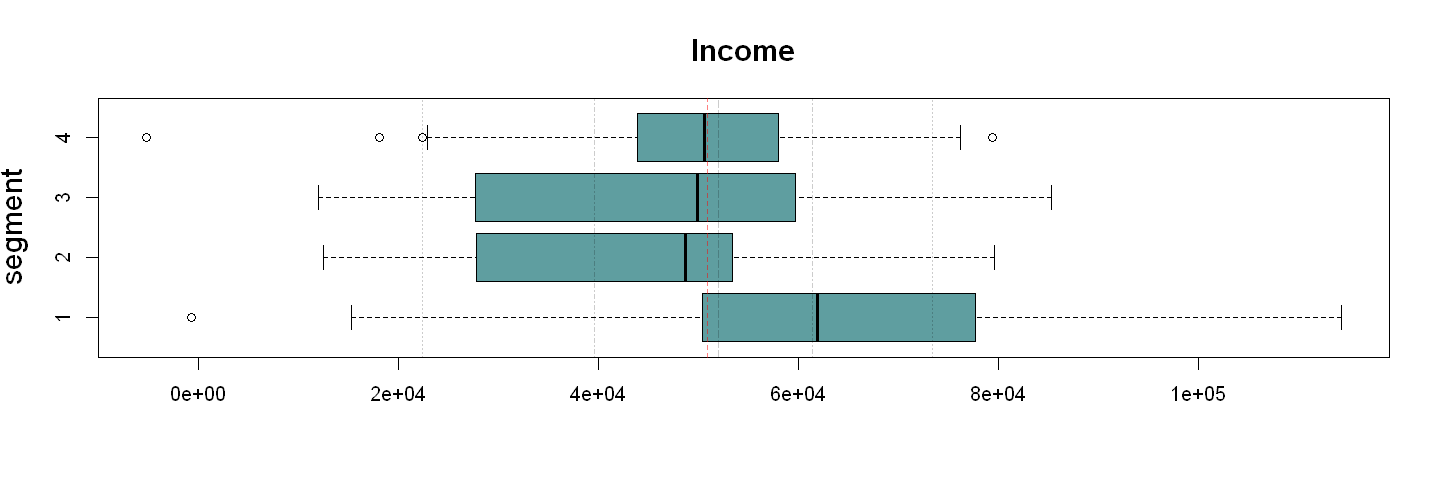

In [33]:
segment_boxplot(dfn$income, clust_k_sz$cluster, 'Income')

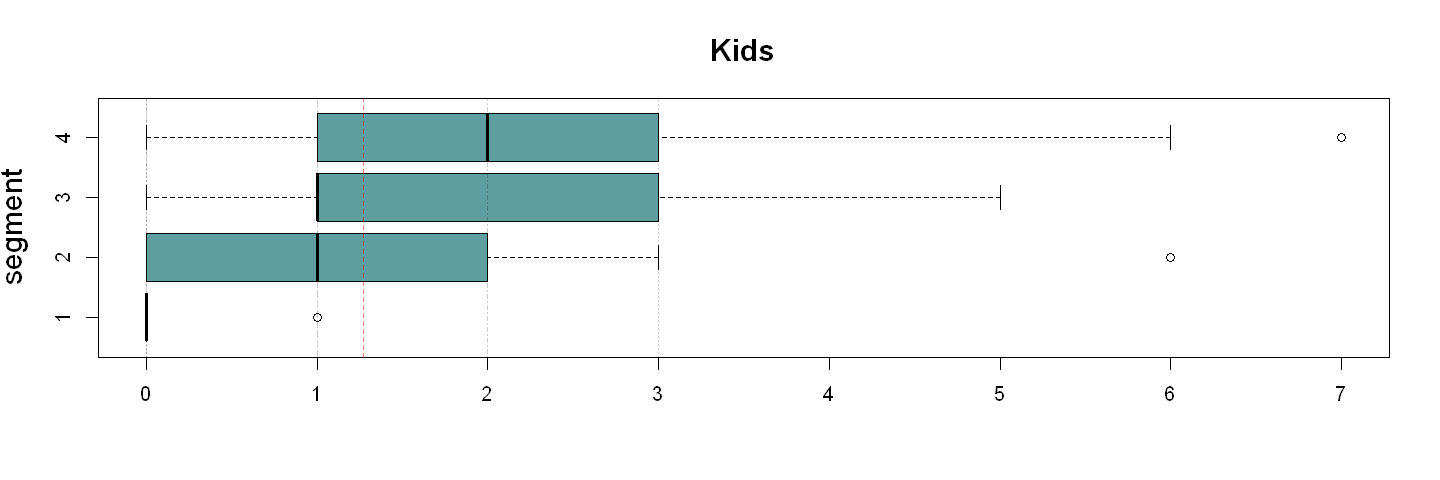

In [34]:
segment_boxplot(dfn$kids, clust_k_sz$cluster, 'Kids')

[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### b) Hierarchical clustering

<b>Agglomerative approach (bottom-up)</b><br>
The clustering process begins with each observation in its own cluster. 
Then observations are clustered together with other observations that are closest to them. 
Centroid of this cluster is then used to measure distance of other observations from it based on which further clustering takes place.
This process continues until all the observations are linked.<br>

<b>Divisive approach (top-down)</b><br>
All observations are presumed to belong to one big cluster and splits are performed recursively by moving dissimilar points into separate clusters.
[To divide the data](https://stats.stackexchange.com/questions/148094/how-to-perform-divisive-hierarchical-clustering), we start by finding the single point which is the most dissimilar to the rest of the cluster.
The most dissimilar point is found by calculating the average distance of that point with all the other points.
The point with the higest average distance is the most dissimilar.
The process stops when we have the desired number of clusters.<br>

<b><i>Which approach is best for you?</i></b><br>
It is always worth trying all the options, but in general, [agglomerative clustering is better](https://towardsdatascience.com/hierarchical-clustering-on-categorical-data-in-r-a27e578f2995) in discovering small clusters, and is used by most software; divisive clustering — in discovering larger clusters.<br>

<b><i>We will use the agglomerative approach here with gower's distance as the metric for dissimilarity matrix - a matrix that reports a metric for the distance between each pair of observation.</i></b>

#### Dissimilarity matrix

In [35]:
# Package that has a function that will return a dissimilarity matrix of Gower's distance
library(cluster)

In [36]:
# Gower's distance matrix
gower_dist = daisy(df)

# Sample of matrix
as.matrix(gower_dist)[1:5, 1:5]

,1,2,3,4,5
1,0.0000000,0.2532815,0.2329028,0.2617250,0.4161338
2,0.2532815,0.0000000,0.0679978,0.4129493,0.3014468
3,0.2329028,0.0679978,0.0000000,0.4246012,0.2932957
4,0.2617250,0.4129493,0.4246012,0.0000000,0.2265436
5,0.4161338,0.3014468,0.2932957,0.2265436,0.0000000


In [37]:
# Understanding the dimensions of the Gower's Distance matrix
a = data.frame(as.matrix(gower_dist))
sapply(a, range)
max(sapply(a, max))

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300
0.0000000,0.0000000,0.0000000,0.000000,0.000000,0.0000000,0.000000,0.0000000,0.0000000,0.0000000,...,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.000000,0.0000000,0.0000000,0.0000000
0.6404662,0.6275138,0.6302252,0.642766,0.683291,0.7093485,0.722094,0.6698627,0.6696568,0.6184889,...,0.6390226,0.7727501,0.6919861,0.6840953,0.6314159,0.6003843,0.680153,0.6514763,0.6298718,0.7033774


[1] 0.8111076

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

#### Hierarchical Clustering

In [38]:
clust_hc = hclust(gower_dist, method='complete')
# complete linkage method, which evaluates the distance between every member when 
# combining observations and groups.

clust_hc


Call:
hclust(d = gower_dist, method = "complete")

Cluster method   : complete 
Number of objects: 300 


<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

#### Dendrogram

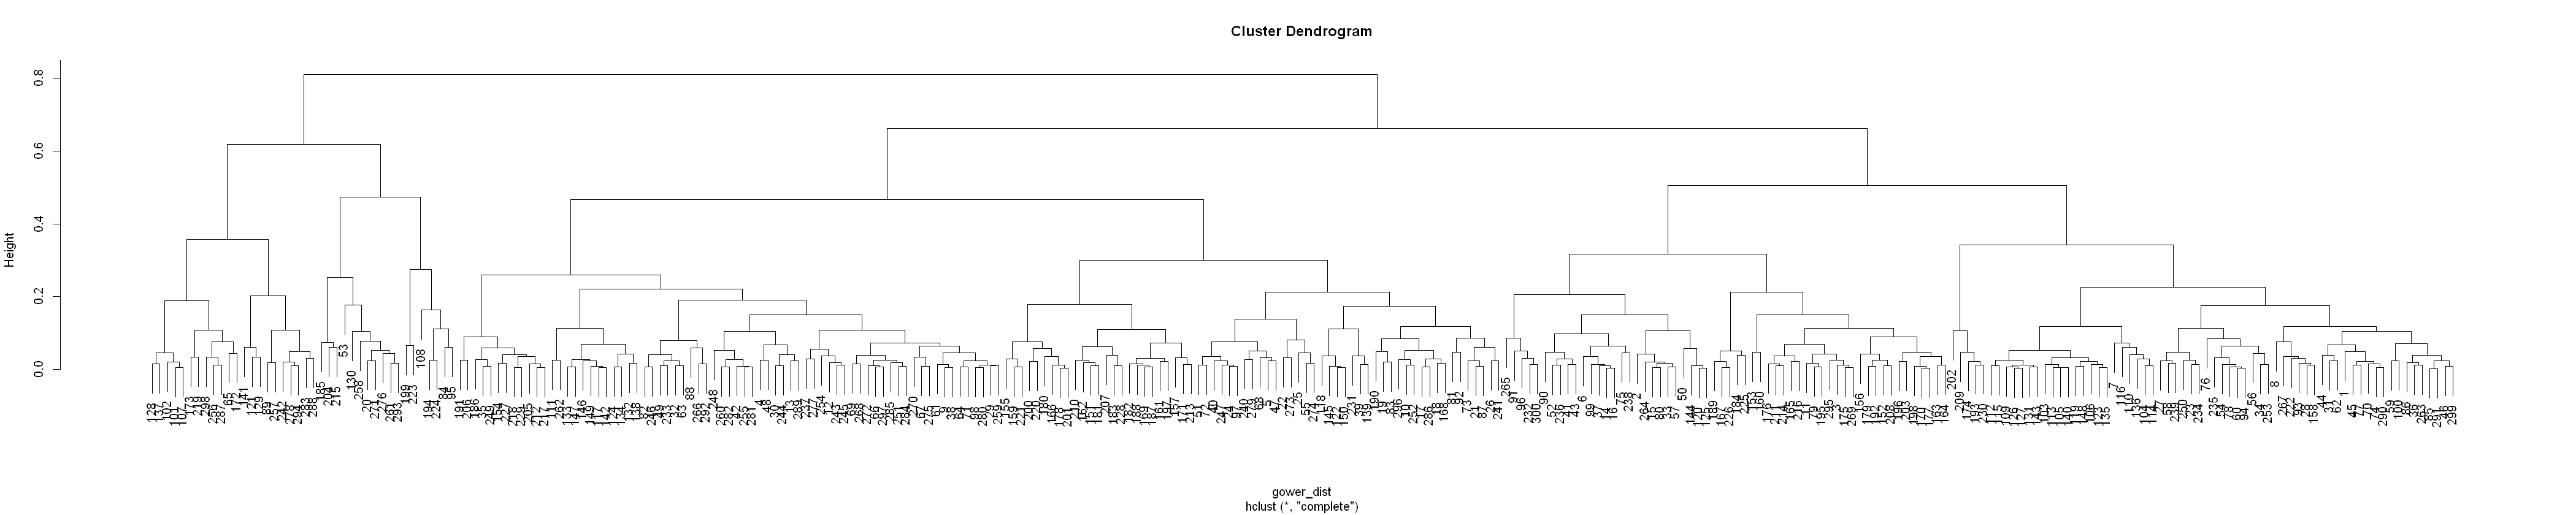

In [39]:
plot_pars(35, 7)
# plot_pars(50, 10)  # to increase legibility
plot(clust_hc)
options(defop)

<b>A hierarchical dendrogram is interpreted primarily by height and where observations are joined. 
The height represents the dissimilarity between elements that are joined.</b>

In [40]:
# Coercing the clustring result inta a dendrogram object
dend1 = as.dendrogram(clust_hc)
dend1

'dendrogram' with 2 branches and 300 members total, at height 0.8111076 

In [41]:
# Cut the dendrogram at a certain height
cut(dend1, h=0.5)

$upper
'dendrogram' with 2 branches and 5 members total, at height 0.8111076 

$lower
$lower[[1]]
'dendrogram' with 2 branches and 22 members total, at height 0.3573151 

$lower[[2]]
'dendrogram' with 2 branches and 18 members total, at height 0.4727599 

$lower[[3]]
'dendrogram' with 2 branches and 136 members total, at height 0.4660957 

$lower[[4]]
'dendrogram' with 2 branches and 58 members total, at height 0.3162601 

$lower[[5]]
'dendrogram' with 2 branches and 66 members total, at height 0.3417087 



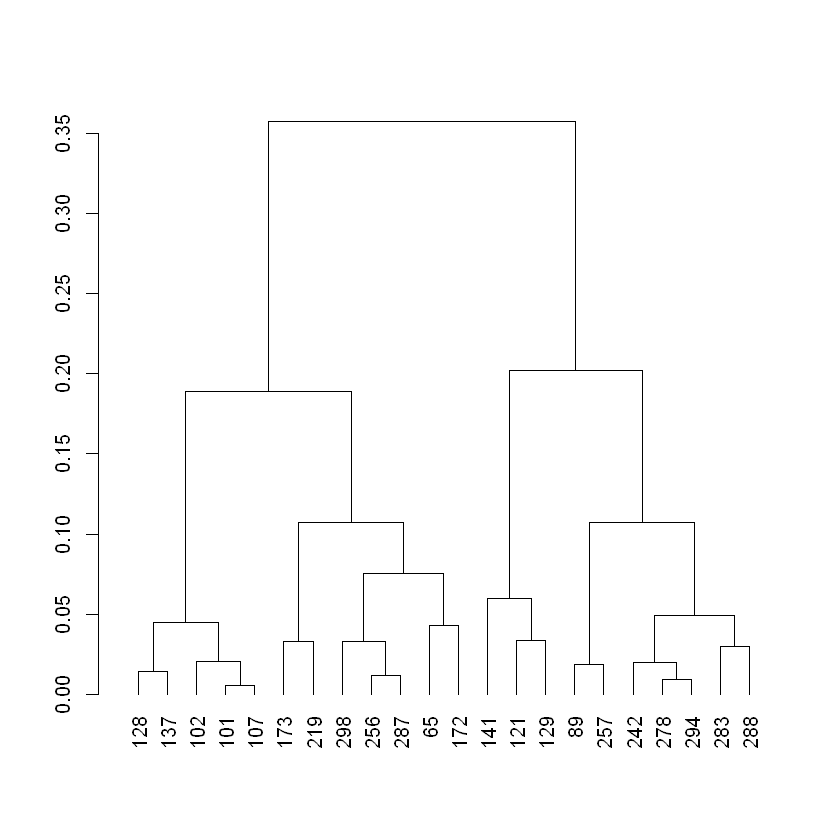

In [42]:
# Select a branch to display
plot(cut(dend1, h=0.5)$lower[[1]])

<div class="alert alert-block alert-info">
    Observations 101 and 107 have very low distance, and 278 and 294 as well. We can take a look at them.
</div>

In [43]:
df[c(101,107),]

df[c(278,294),]

,age,gender,income,kids,ownHome,subscribe
,<dbl>,<fct>,<dbl>,<int>,<fct>,<fct>
101,24.73796,Male,18457.85,1,ownNo,subYes
107,23.19013,Male,17510.28,1,ownNo,subYes


,age,gender,income,kids,ownHome,subscribe
,<dbl>,<fct>,<dbl>,<int>,<fct>,<fct>
278,36.23860,Female,46540.88,1,ownNo,subYes
294,35.79961,Female,52352.69,1,ownNo,subYes


<div class="alert alert-block alert-info">
Members of both pairings have very similar characteristics.<br>
</div>

<i>Now, we will pick 2 observations from widely separated branches and compare them. Lets pick 172 and 141.</i>

In [44]:
df[c(172, 141), ]

,age,gender,income,kids,ownHome,subscribe
,<dbl>,<fct>,<dbl>,<int>,<fct>,<fct>
172,49.43379,Male,61153.43,0,ownNo,subYes
141,25.17703,Female,20125.80,2,ownNo,subYes


<div class="alert alert-block alert-info">
These 2 points differ significantly with each other in all but 2 respects (home ownership and subcription)<br>
</div>

<i>Picking the points from the opposite ends of the full dendogram - 128 and 299.</i>

In [45]:
df[c(128, 299), ]

,age,gender,income,kids,ownHome,subscribe
,<dbl>,<fct>,<dbl>,<int>,<fct>,<fct>
128,21.80737,Male,27807.24,2,ownNo,subYes
299,33.17036,Male,60747.34,1,ownNo,subNo


<div class="alert alert-block alert-info">
The differences in this pairing is not as stark as was for (172,141) but are still significant.
But, one major difference that's present in this case is - subscription. So, the categorical variables exert a very strong influence in the calculations of distances.
</div>

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

#### Goodness-of-fit test
Cophenetic Correlation Coefficient (CPCC), assesses how well a dendrogram matches the true distance
metric.  
It is interpreted similarly to Pearson’s r.

In [46]:
cor(cophenetic(clust_hc), gower_dist)

[1] 0.7682436

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

#### Segment assignments
<i>How do we get specific segment assignments?<br></i>
A dendrogram can be cut into clusters at any height desired, resulting in different numbers of groups.<br>
Because a dendrogram can be cut at any point, the analyst must specify the number of groups desired.<br><br>
Looking at the dendrogram, k=4 seems to be a good cut-off point.

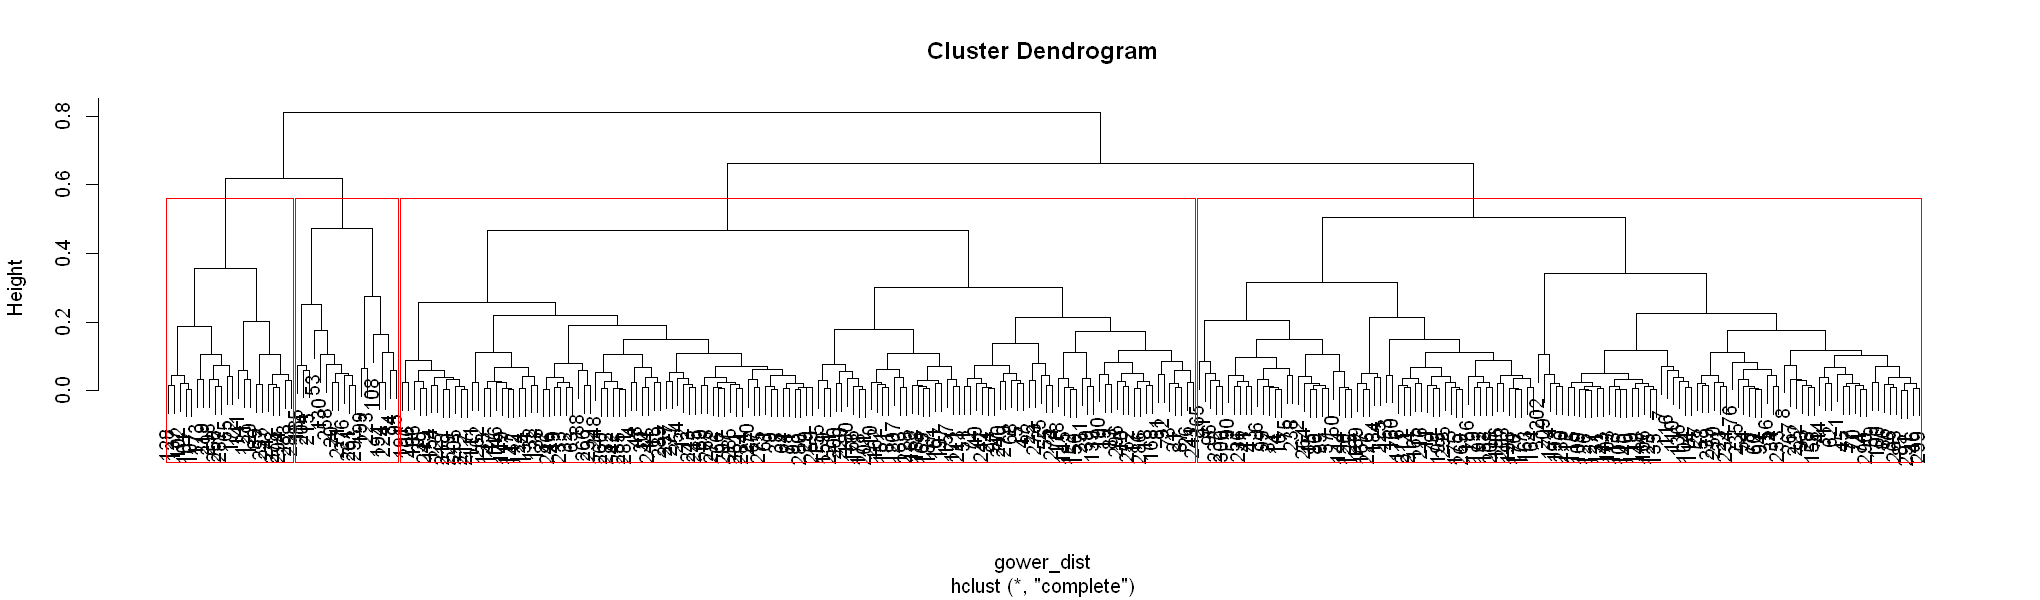

In [47]:
# We can see where the dendrogram would be cut by
plot_pars(17,5)
plot(clust_hc)
rect.hclust(clust_hc, k=4, border='red')

In [48]:
# Obtain the assignment vector for observations
clust_hc_segments = cutree(clust_hc, k=4)
table(clust_hc_segments)

clust_hc_segments
  1   2   3   4 
124 136  18  22 

We can see that groups 1 and 2 dominate the assignment.

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

#### Segment summary

In [49]:
# Mean factor value for each segment
seg_summ(dfn, clust_hc_segments)

Group.1,age,income,kids,male,ownHome,subscribe
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,40.78456,49454.08,1.314516,1.0000000,0.4677419,0
2,42.03492,53759.62,1.235294,0.0000000,0.4779412,0
3,44.31194,52628.42,1.388889,0.3888889,1.0000000,1
4,35.82935,40456.14,1.136364,0.5454545,0.0000000,1


<div class="alert alert-block alert-info">
We can see that groups 1 and 2 represent non-subscribers that have been divided along the lines of gender.<br>
Groups 3 and 4 contain subscribers and have been segregated into home owners and renters.<br>
These results are not very nuanced or insightful.
</div>

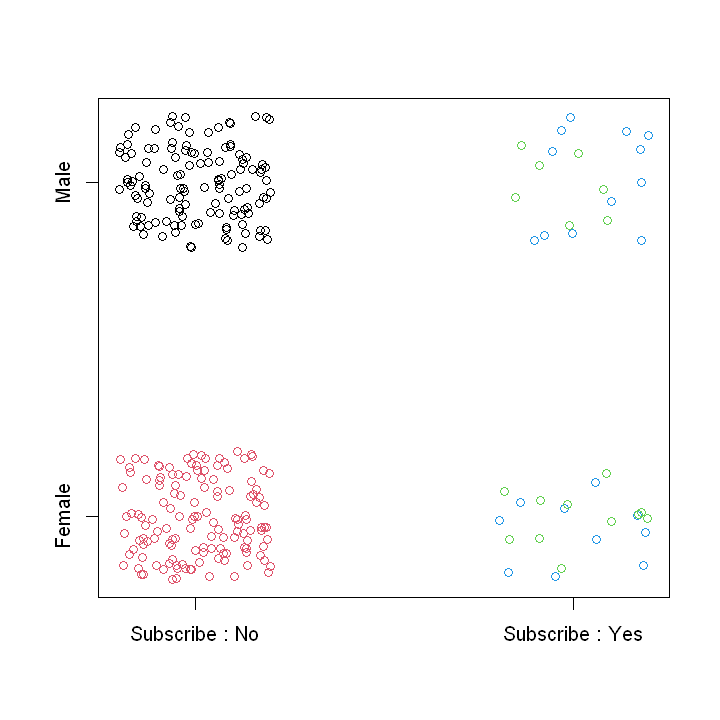

In [50]:
# Plotting segments
plot_pars(6,6)
plot(jitter(dfn$male) ~ jitter(dfn$subscribe), 
     col=clust_hc_segments, yaxt='n', xaxt='n', ylab='', xlab='')
# jitter adds a bit of noise to coordinates to prevent them from being plotted over one another
axis(1, at=c(0,1), labels=c('Subscribe : No', 'Subscribe : Yes'))
axis(2, at=c(0,1), labels=c('Female','Male'))

<div class="alert alert-block alert-info">
The reason for such simple and uninteresting results from hierarchical clustering could be the rescaling done on the categorical columns.
In the dataset, we had only binary categorical variables, that were rescaled to [0,1], which made the two-category factors (gender, ownHome, subscribe) more influential.<br>
We need to try other methods.
</div>

[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### c) Model-based clustering

The key idea for model-based clustering is that observations come from groups with different statistical distributions (such as different means and variances). 
The algorithms try to find the best set of such underlying distributions to explain the observed data.

Such models are also known as "mixture models" because it is assumed that the data reflect a mixture of observations drawn from different populations, although we don’t know which population each observation was drawn from. 
We are trying to estimate the underlying population parameters and the mixture proportion.

<b>Gaussian Mixture Model</b><br>
It is presumed that the clusters come from different distributions but all of them are gaussian or normal distributions.
The algorithm used below (Mclust) assumes a Gaussian Mixture Model.

In [51]:
suppressPackageStartupMessages(library(mclust))

Warning message:
"package 'mclust' was built under R version 4.0.4"


In [52]:
mclustBIC(dfn)

Bayesian Information Criterion (BIC): 
        EII       VII       EEI       VEI       EVI       VVI       EEE
1 -37594.16 -37594.16 -11369.71 -11369.71 -11369.71 -11369.71 -11261.94
2 -36337.62 -36278.17 -11312.03 -11228.35        NA        NA -11302.11
3 -35132.35 -34841.45        NA -10822.91        NA        NA        NA
4 -34321.30 -33902.19        NA        NA        NA        NA        NA
5 -33743.24 -33687.95        NA        NA        NA        NA        NA
6 -33351.92 -32949.37        NA        NA        NA        NA        NA
7 -33082.08 -32531.97        NA        NA        NA        NA        NA
8 -32609.96 -32158.18        NA        NA        NA        NA        NA
9 -32460.92 -31904.89        NA        NA        NA        NA        NA
        VEE       EVE       VVE       EEV       VEV       EVV       VVV
1 -11261.94 -11261.94 -11261.94 -11261.94 -11261.94 -11261.94 -11261.94
2        NA        NA        NA -11293.12 -11174.77        NA        NA
3        NA        NA    

In [53]:
clust_mc = Mclust(dfn)
summary(clust_mc)

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VEV (ellipsoidal, equal shape) model with 3 components: 

 log-likelihood   n df       BIC       ICL
      -5137.106 300 73 -10690.59 -10690.59

Clustering table:
  1   2   3 
163  71  66 

<div class="alert alert-block alert-info">
The Mclust result tells us that the data is best described as being sampled from 3 different normal distributions.<br>
We also see log-likelihood information, which we can use to compare models.<br>
We will force a 4 cluster solution to the Mclust algorithm and then compare the two models.
</div>

In [54]:
clust_mc4 = Mclust(dfn, G=4)
summary(clust_mc4)

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VII (spherical, varying volume) model with 4 components: 

 log-likelihood   n df       BIC       ICL
      -16862.69 300 31 -33902.19 -33906.18

Clustering table:
  1   2   3   4 
104  66  59  71 

#### Comparing Models with BIC
Bayesian Information Criterion (BIC) is a criterion for model selection among a finite set of models; the model with the lowest BIC is preferred.

<div align='center'><b>Interpretation of BIC when comparing 2 models</b></div>
$$
\begin{array}{l|l|l}
\hline \text { BIC difference } & \text { Odds of model superiority } & \text { Strength of the evidence } \\
\hline 0-2 & 50-75 \% & \text { Weak } \\
\hline 2-6 & 75-95 \% & \text { Positive } \\
\hline 6-10 & 95-99 \% & \text { Strong } \\
\hline>10 & >99 \% & \text { Very strong } \\
\hline
\end{array}
$$

In [55]:
BIC(clust_mc, clust_mc4)

,df,BIC
,<dbl>,<dbl>
clust_mc,73,10690.59
clust_mc4,31,33902.19


<div class="alert alert-block alert-info">
    The 3 cluster model (BIC=10690) is a much better fit to the gaussian mixture assumption, than the 4 cluster model (BIC=33902) because it has a lower BIC value.<br>
    However, that doesn't mean that the 3 cluster model is more correct. 
    It only means, that between the two models, the 3 cluster solution has much stronger evidence based on the data.<br>
    But which model provides more useful insight?
</div>

In [56]:
seg_summ(dfn, clust_mc$classification)

Group.1,age,income,kids,male,ownHome,subscribe
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,44.68018,52980.52,1.171779,0.4723926,0.8650307,0.2453988
2,38.02229,51550.98,1.422535,0.0000000,0.0000000,0.0000000
3,36.02187,45227.51,1.348485,1.0000000,0.0000000,0.0000000


<div class="alert alert-block alert-info">
    Age, income and kids don't vary much.<br>
    Group 2 is all-female, while 3 is all-male.<br>
    Groups 2 and 3 are renters and non-subscibers.<br><br>
    Finding clusters with distinct subscription behaviour can be useful for identifying groups to approach or avoid because of their low subsciption numbers.
    But looking at the non-subsciber clusters, the only significant distinction we get between the 2 is in gender. 
    Other variables have similar mean values.<br>
    The clusterization seems to highlight them as merely subscribers and non-subscibers, not as actionable results.
</div>

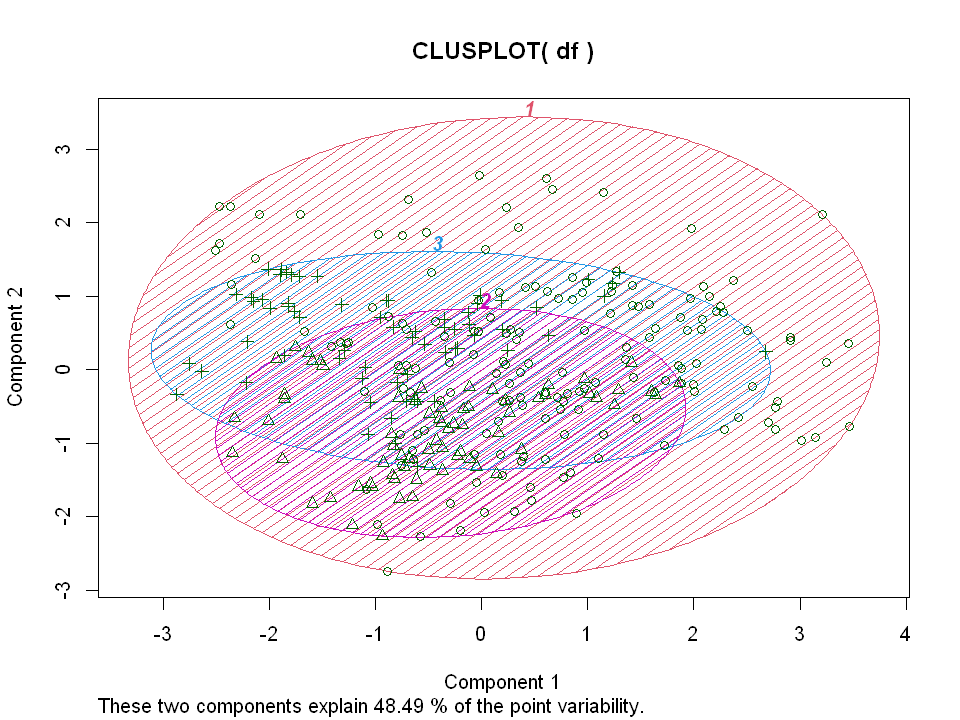

In [57]:
# Plot of first 2 principal components of the predictors
plot_pars(8,6)
clusplot(df, clust_mc$classification, color=T, shade=T, labels=4, lines=0)

<div class="alert alert-block alert-info">
    The clusplot exhibits a great degree of overlap.<br> 
    The 3 cluster solution has not made enough distinction in the sample.
</div>

[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### d) Latent Class Analysis

A latent class model (LCM) relates a set of observed (usually discrete) multivariate variables to a set of latent variables. [(wiki)](https://en.wikipedia.org/wiki/Latent_class_model)<br>
Latent variables are variables that are not directly observed but have been inferred from other variables that have been observed.  

Latent class analysis (LCA) is used to find groups or subtypes of cases in multivariate categorical data and is similar to mixture modeling in the assumption that differences are attributable to unobserved groups that one wishes to uncover. 

But since LCA can be done on categorical variables only, we'll need to convert our numeric variables into categories. 
One of the ways to do that is simply recode the numerical column as binary with regards to a specified cutting point.<br>

Here, we will use median as the cutoff point.

#### Convert numerical variables to categorical

In [58]:
dfc = data.frame(df)
dfc$age = factor(ifelse(df$age < median(df$age), 1, 2))
dfc$income = factor(ifelse(df$income < median(df$income), 1, 2))
dfc$kids = factor(ifelse(df$kids < median(df$kids), 1, 2))
head(dfc, 4)

,age,gender,income,kids,ownHome,subscribe
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,2,Male,1,2,ownNo,subNo
2,1,Male,1,2,ownYes,subNo
3,2,Male,1,1,ownYes,subNo
4,1,Female,2,2,ownNo,subNo


In [59]:
summary(dfc)

 age        gender    income  kids      ownHome     subscribe  
 1:150   Female:157   1:150   1:121   ownNo :159   subNo :260  
 2:150   Male  :143   2:150   2:179   ownYes:141   subYes: 40  

#### Model dependent variables wrt model intercepts

In [60]:
suppressPackageStartupMessages(library(poLCA))

Warning message:
"package 'poLCA' was built under R version 4.0.4"


In [61]:
# Model dependent variables wrt model intercepts
seg_f = with(dfc, cbind (age , gender , income , kids , ownHome , subscribe ) ~ 1)

In [62]:
# Create models with k=3 and k=4
set.seed(02807)
clust_lca3 = poLCA(seg_f, data=dfc, nclass=3)
clust_lca4 = poLCA(seg_f, data=dfc, nclass=4)

Conditional item response (column) probabilities,
 by outcome variable, for each class (row) 
 
$age
               1      2
class 1:  1.0000 0.0000
class 2:  0.0000 1.0000
class 3:  0.6555 0.3445

$gender
          Female   Male
class 1:  0.4211 0.5789
class 2:  0.4681 0.5319
class 3:  0.6079 0.3921

$income
               1      2
class 1:  1.0000 0.0000
class 2:  0.3803 0.6197
class 3:  0.3746 0.6254

$kids
               1      2
class 1:  0.2818 0.7182
class 2:  0.8065 0.1935
class 3:  0.1575 0.8425

$ownHome
           ownNo ownYes
class 1:  0.7289 0.2711
class 2:  0.2338 0.7662
class 3:  0.6638 0.3362

$subscribe
           subNo subYes
class 1:  0.7496 0.2504
class 2:  0.8948 0.1052
class 3:  0.8960 0.1040

Estimated class population shares 
 0.1974 0.341 0.4616 
 
Predicted class memberships (by modal posterior prob.) 
 0.2333 0.3467 0.42 
 
Fit for 3 latent classes: 
number of observations: 300 
number of estimated parameters: 20 
residual degrees of freedom: 43 
maximum log-

In [63]:
# Compare BIC values
clust_lca3$bic
clust_lca4$bic

clust_lca4$bic - clust_lca3$bic

[1] 2298.767

[1] 2330.043

[1] 31.2768

<div class="alert alert-block alert-info">
    The 3-cluster model shows a lower BIC by 32 and thus a substantially stronger fit to the data.
</div>

In [64]:
seg_summ(dfn, clust_lca3$predclass)

Group.1,age,income,kids,male,ownHome,subscribe
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,28.22385,30075.32,1.1285714,0.6857143,0.2857143,0.27142857
2,54.44407,60082.47,0.3846154,0.5769231,0.7692308,0.10576923
3,37.47652,54977.08,2.0793651,0.2777778,0.3253968,0.07936508


In [65]:
seg_summ(dfn, clust_lca4$predclass)

Group.1,age,income,kids,male,ownHome,subscribe
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,36.62554,52080.13,2.1951220,0.3495935,0.34959350,0.11382114
2,53.64073,60534.17,0.5178571,0.5357143,0.78571429,0.09821429
3,30.22575,41361.81,0.0000000,0.0500000,0.35000000,0.00000000
4,27.61506,28178.70,1.1777778,0.8666667,0.06666667,0.33333333


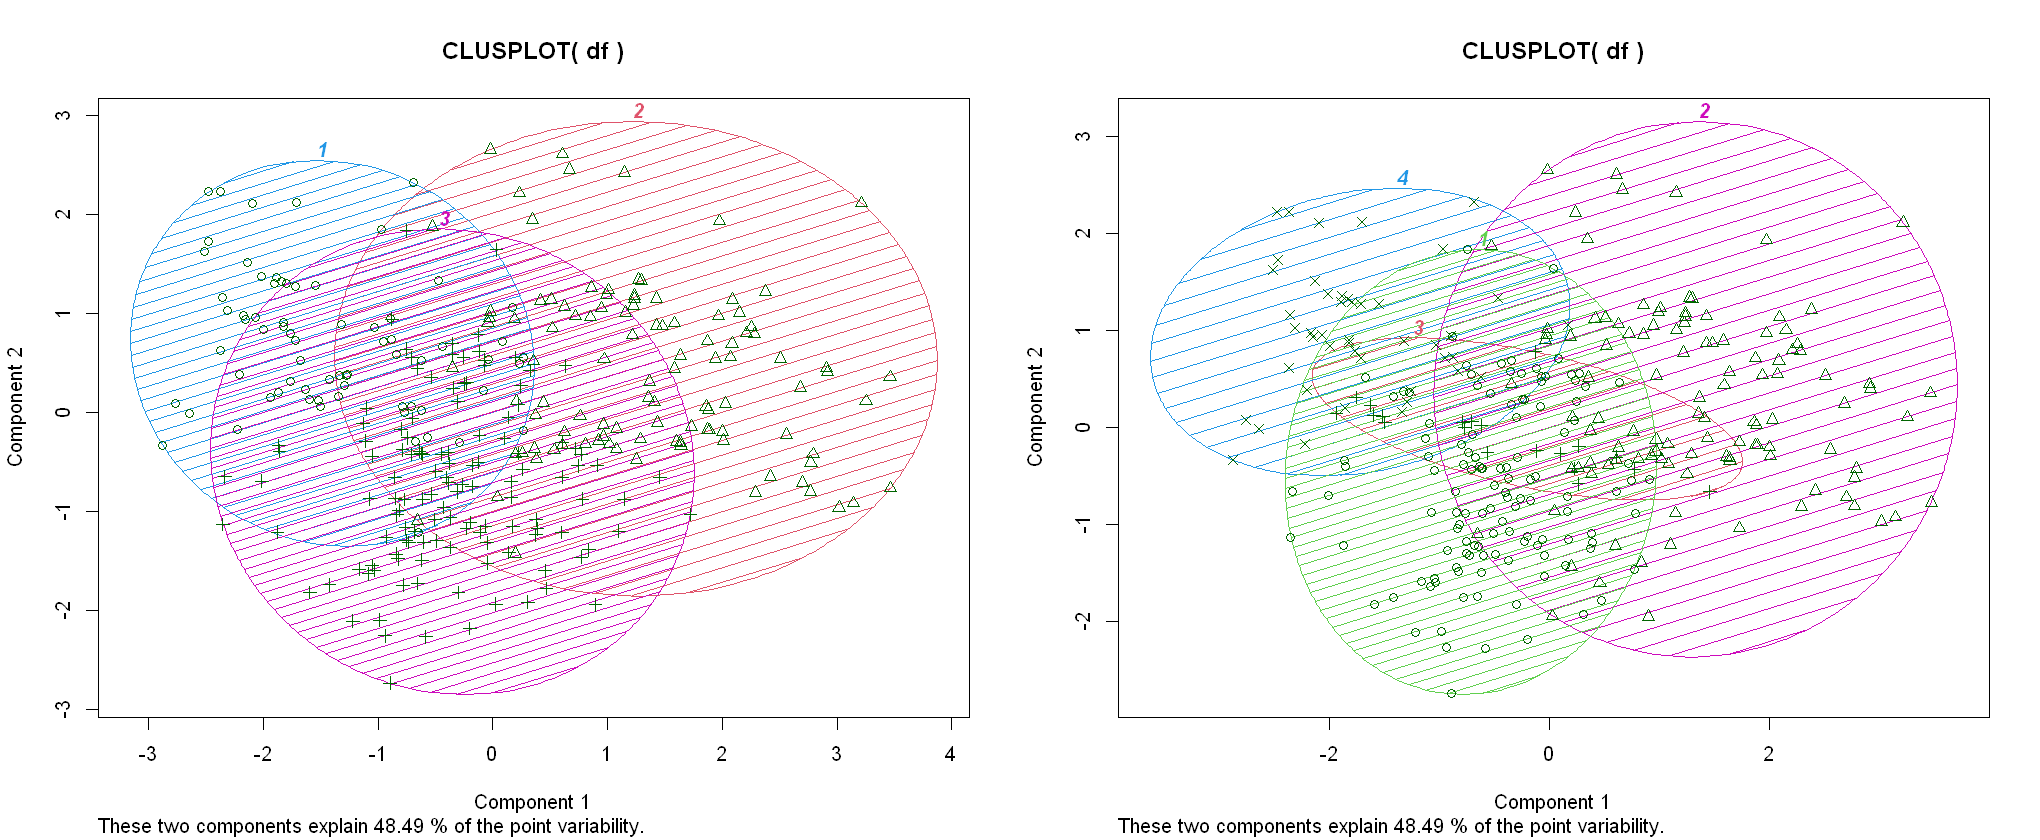

In [66]:
par(mfrow=c(1,2))
plot_pars(17, 7)
clusplot(df, clust_lca3$predclass, color=T, shade=T, labels=4, lines=0)
clusplot(df, clust_lca4$predclass, color=T, shade=T, labels=4, lines=0)

<div class="alert alert-block alert-info">
    There is variation across groups in both the 3 segment and 4 segment solutions.<br><br>
    <b>Does the additional group in the 4-cluster solution add anything to our interpretation?</b><br>
    One argument in favor of the 4-cluster solution is that Group 3 has no subscribers and is relatively well-identified (mostly younger women with no kids) that might make it an appealing group either for targeting or exclusion, depending on one’s strategy.<br>
    In either case, for these data the differentiation appears to be clearer than the solutions we found above with Mclust; this demonstrates the value of trying multiple approaches.
</div>

[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

## 7) Comparing Cluster Solutions

Given that we know the real group membership (`y = dfo['Segment']`), how does it compare to clustering method's results?<br>

The answer is not as simple as counting agreement. There are 2 reasons for that:<br>
    1) It is not obvious how to match one cluster solution to another because the order of group labels is arbitrary. Group 1 under 1 method might appear as group 3 under another.<br>
    2) Second, if we solve the matching problem we still need to adjust for chance agreement.
    Is an agreement rate of 90% good? It depends on the base rate. If base rate is 50% (like gender ratio in the world), then 90% accuracy is much better than chance (50%). If base rate is 99%+ (Japanese speakers in Japan), then 90% accuracy is terrible.

The mclust package provides tools to solve both issues.
1) `mapclass()` &rarr; solves the matching problem by selecting a mapping that maximizes agreement between the two assignment schemes.<br>
2) `adjustedRandIndex()` matches two assignment schemes and then computes the degree of agreement over and above what might be attributed to "chance" by simply assigning all observations to the largest group. Its magnitude may be interpreted similarly to a standard r correlation coefficient.

#### LCA3 vs LCA4

In [67]:
# Assignments in lca4 where lca3 class is 1
table(clust_lca4$predclass[clust_lca3$predclass == 1])

# When above is implemented for all classes in lca4
table(clust_lca3$predclass, clust_lca4$predclass)


 1  3  4 
13 12 45 

   
      1   2   3   4
  1  13   0  12  45
  2   0 104   0   0
  3 110   8   8   0

<div class="alert alert-block alert-info">
From the table it would appear that :<br>
- group 1 of lca4 finds most agreement with lca3's group 1 (110 common).<br>
- group 2 of lca4 finds most agreement with lca3's group 2 (104 common).<br>
- group 1 of lca3 has been split between groups 1, 2 and 3 of lca4.<br>

However, matching groups manually is sometimes unclear and generally error-prone.<br>
Instead we will use `mapclass` and `adjustedRandIndex`.
</div>

In [68]:
# Match classes
mapClass(clust_lca3$predclass, clust_lca4$predclass)

$aTOb
$aTOb$`1`
[1] 4

$aTOb$`2`
[1] 2

$aTOb$`3`
[1] 1


$bTOa
$bTOa$`1`
[1] 3

$bTOa$`2`
[1] 2

$bTOa$`3`
[1] 1

$bTOa$`4`
[1] 1

<div class="alert alert-block alert-info">
The above mapping tells us that:<br>
3 and 4 of lca4 maps best to 1 of lca3.<br>
1 of lca4 ~ 3 of lca3<br>
2 of lca4 ~ 2 of lca3
</div>

In [69]:
# Index of agreement between classes
adjustedRandIndex(clust_lca3$predclass, clust_lca4$predclass)

[1] 0.7288822

<div class="alert alert-block alert-info">
The adjusted Rand index of 0.729 indicates that the match between the two assignment lists is much better than chance.<br>
From a business perspective, it also tells us that the 3-cluster and 4-cluster differ modestly from one another, which provides another perspective on choosing between them.

A rand index near 0 would imply that the match between the clusters is no better than random chance.
</div>

#### LCA4 vs y

In [70]:
table(clust_lca4$predclass, unlist(y))

   
    Moving up Suburb mix Travelers Urban hip
  1        50         62         0        11
  2         4         29        79         0
  3         8          2         1         9
  4         8          7         0        30

In [71]:
adjustedRandIndex(clust_lca4$predclass, unlist(y))

[1] 0.3513031

<div class="alert alert-block alert-info">
    With a Rand index of 0.35, the LCA solution matches the true segment assignments moderately better than chance alone. <br><br>
    In many cases, of course, one would not have identified clusters for comparison; but when they are available from other projects or previous efforts, it is helpful to examine correspondence in this way.
</div>

#### mclust segments vs y

In [72]:
table(clust_mc$classification, unlist(y))
adjustedRandIndex(clust_mc$classification, unlist(y))

   
    Moving up Suburb mix Travelers Urban hip
  1        32         50        63        18
  2        28         22        10        11
  3        10         28         7        21

[1] 0.05119133

<div class="alert alert-block alert-info">
    Model segmentation is as good as random segmentation.
</div>

#### mclust4 segments vs y

In [73]:
table(clust_mc4$classification, unlist(y))
adjustedRandIndex(clust_mc4$classification, unlist(y))

   
    Moving up Suburb mix Travelers Urban hip
  1        42         43        19         0
  2        12         20        34         0
  3        13         30        16         0
  4         3          7        11        50

[1] 0.1876147

<div class="alert alert-block alert-info">
    Model segmentation is marginally better than random segmentation.
</div>

#### kmeans segments vs y

In [74]:
table(clust_k$cluster, unlist(y))
adjustedRandIndex(clust_k$cluster, unlist(y))

   
    Moving up Suburb mix Travelers Urban hip
  1         0          4        21         0
  2         1          5         7        50
  3        44         46        25         0
  4        25         45        27         0

[1] 0.2055854

<div class="alert alert-block alert-info">
    Adjusted Rand Index of the Kmeans model (0.201) suggests there is a mild benefit of using the model over random chance segmentation.
</div>

#### heirarchical segments vs y

In [75]:
table(clust_hc_segments, unlist(y))
adjustedRandIndex(clust_hc_segments, unlist(y))

                 
clust_hc_segments Moving up Suburb mix Travelers Urban hip
                1        18         49        33        24
                2        38         45        37        16
                3         5          4         7         2
                4         9          2         3         8

[1] 0.02152095

<div class="alert alert-block alert-info">
    With and Adjusted Rand Index of 0.02, the Hierarchical Model segmentation is as good as random segmentation.
</div>

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

## 8) Concluding summary

Above we learned a few methods for identifying potential groups of observations in a data set.
The problem of how to predict (classify) observations into groups after those groups have been defined, falls under classification.<br>

<b>Two points that are crucial for success in segmentation projects :</b><br>
1) Different methods are likely to yield different solutions, and in general there is no absolute “right” answer. We recommend to try multiple clustering methods with different potential numbers of clusters.<br>

2) The results of segmentation are primarily about business value, and solutions should be evaluated in terms of both model fit (e.g., using BIC()) and business utility. Although model fit is an important criterion and should not be overlooked, it is ultimately necessary that an answer can be communicated to and used by stakeholders.

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

[go to toc](#index)

<table>
<tr style="background-color:white">
    <th><b>-------------------------------------------- &ensp; &nbsp;</b></th>
    <th>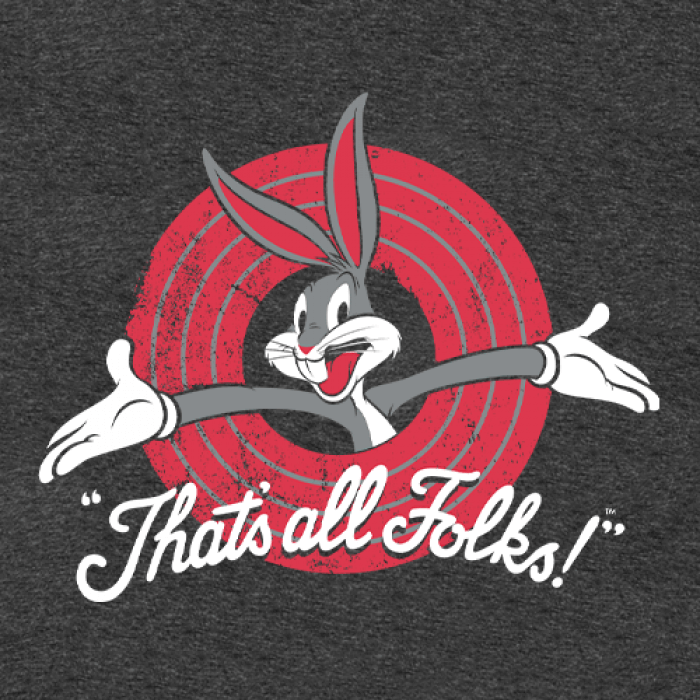</th><th style="float:right"></th>
    <th><b> &ensp;--------------------------------------------</b></th>
</tr>
</table>